In [13]:
import pandas as pd
import nltk
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [14]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zahra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zahra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
file_path = r"C:\Users\zahra\all-data.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1", header=None, names=["Sentiment", "Text"])

In [16]:
sentiment_mapping = {"positive": 1, "neutral": 0, "negative": -1}
df["Sentiment"] = df["Sentiment"].map(sentiment_mapping)

In [17]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [18]:
def preprocess_text(text):
    text = re.sub(r'\d+', '', text.lower().translate(str.maketrans("", "", string.punctuation)))
    return " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

In [19]:
df["Cleaned_Text"] = df["Text"].astype(str).apply(preprocess_text)

In [20]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["Cleaned_Text"])
y = df["Sentiment"]

In [21]:
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [22]:
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=3, scoring='accuracy')
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

In [23]:
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

In [24]:
y_pred_svm = best_svm.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

SVM Accuracy: 0.9293981481481481
              precision    recall  f1-score   support

          -1       0.97      0.99      0.98       564
           0       0.88      0.92      0.90       580
           1       0.94      0.88      0.91       584

    accuracy                           0.93      1728
   macro avg       0.93      0.93      0.93      1728
weighted avg       0.93      0.93      0.93      1728

Random Forest Accuracy: 0.8958333333333334
              precision    recall  f1-score   support

          -1       0.97      0.93      0.95       564
           0       0.81      0.92      0.86       580
           1       0.93      0.83      0.88       584

    accuracy                           0.90      1728
   macro avg       0.90      0.90      0.90      1728
weighted avg       0.90      0.90      0.90      1728



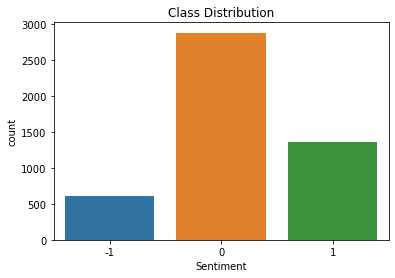

In [25]:
sns.countplot(data=df, x="Sentiment")
plt.title("Class Distribution")
plt.show()

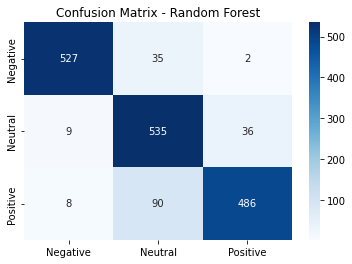

In [26]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [27]:
df.to_csv(r"C:\Users\zahra\sentiment_results.csv", index=False)